In [1]:
%load_ext autoreload
%autoreload 2

import numpy  as np
import pandas as pd
import h5py

from matplotlib import pyplot as plt, cm

from common import hallmark as hm
from common import viz

In [2]:
pf = hm.ParaFrame('cache/Illinois_thermal_w{win:d}/{mag}a{aspin:g}_i{inc:d}/sed_Rh{Rhigh:d}.h5')

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])

Rhigh [  1  10  40 160]
win [3 4 5]
mag ['M' 'S']
inc [ 10  30  50  70  90 110 130 150 170]
aspin [-0.94 -0.5   0.    0.5   0.94]


In [3]:
def readsed(f):
    with h5py.File(f) as h:
        time = h['time'][:]
        nu   = h['nu'  ][:]
        knd  = h['knd' ][:]
        avg  = h['avg' ][:]
        # err  = h['err' ][:]
        rlz  = h['len' ][:]

    if not all(rlz == 16):
        print('WARNING: less than 16 realizations:', f)
        
    return nu, np.mean(avg[:,:,0],axis=0), knd

In [4]:
#cmap   = cm.get_cmap('hsv')
#colors = [cmap(i/9) for i in range(9)]
colors = ['darkred', 'red', 'darkorange', 'gold', 'darkgreen', 'darkcyan',  'deepskyblue', 'darkblue', 'purple']

def plot(ax, pf):
    for i, p in enumerate(pf.path):
        nu, avg, knd = readsed(p)
        viz.step(ax, nu, avg, color=colors[i], alpha=0.5, step=False)
    ax.set_xlim(1e9,  1e23)
    ax.set_ylim(1e27, 1e37)

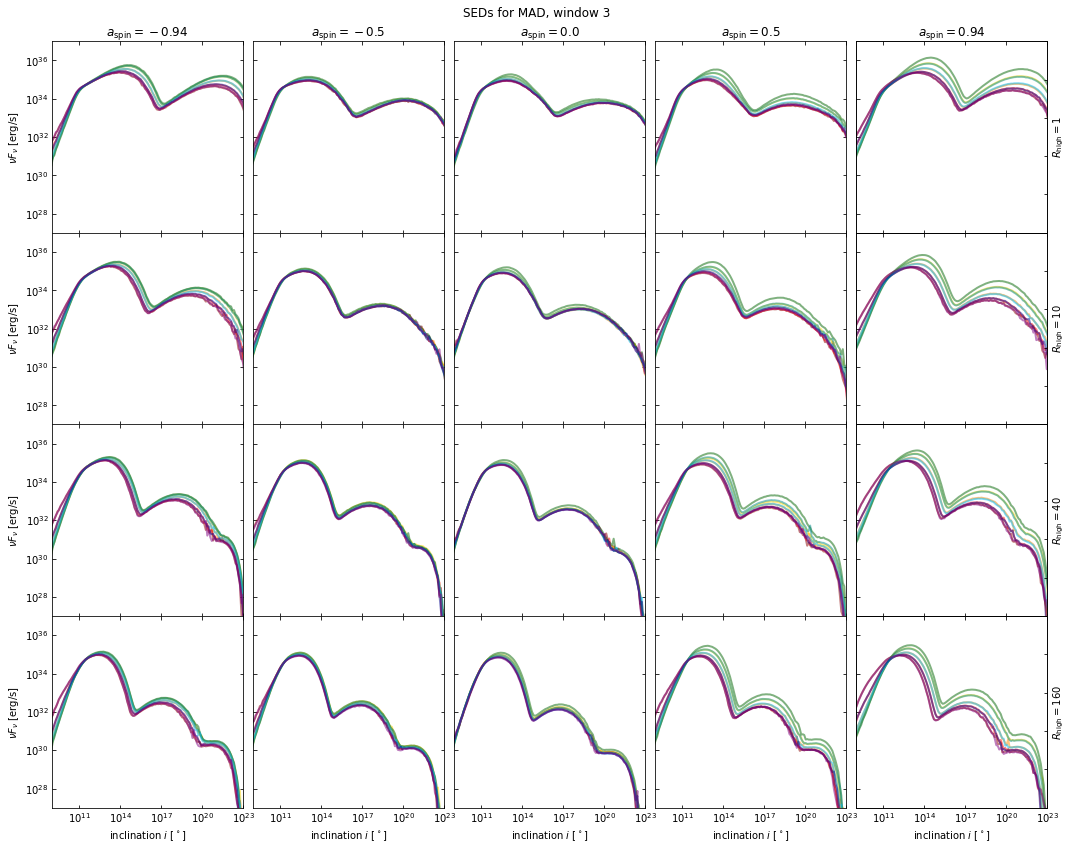

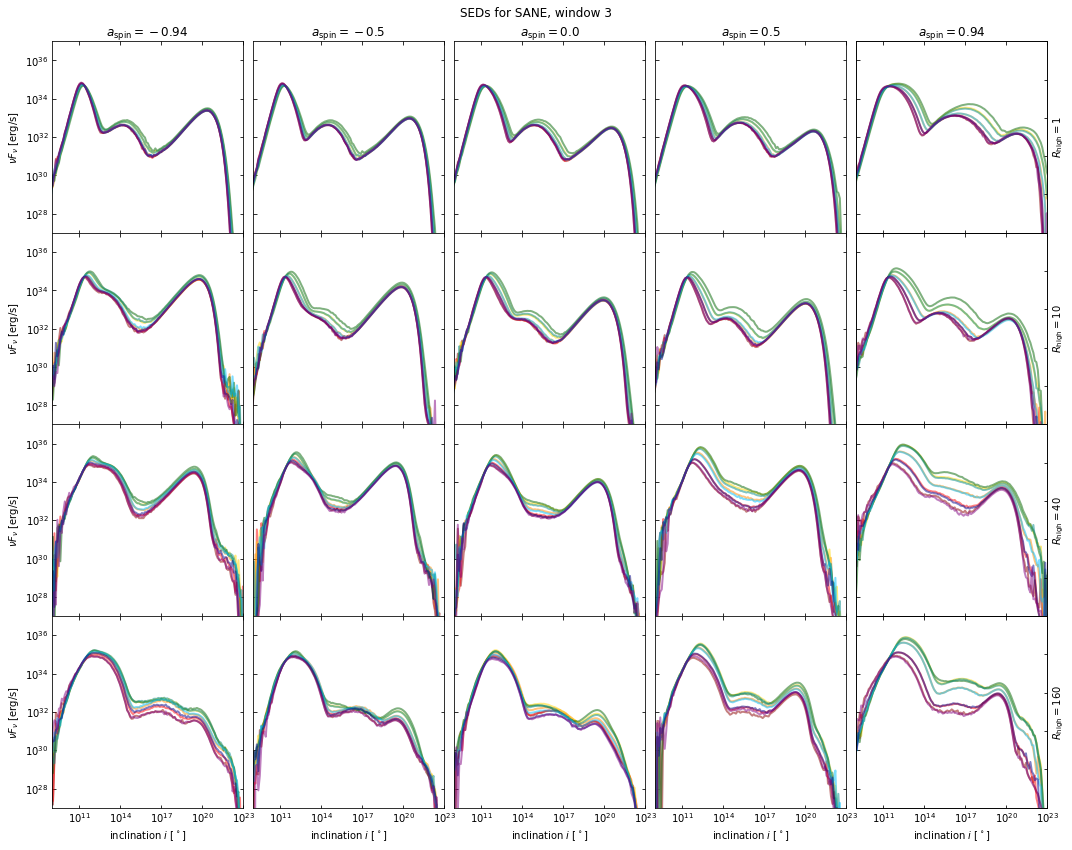

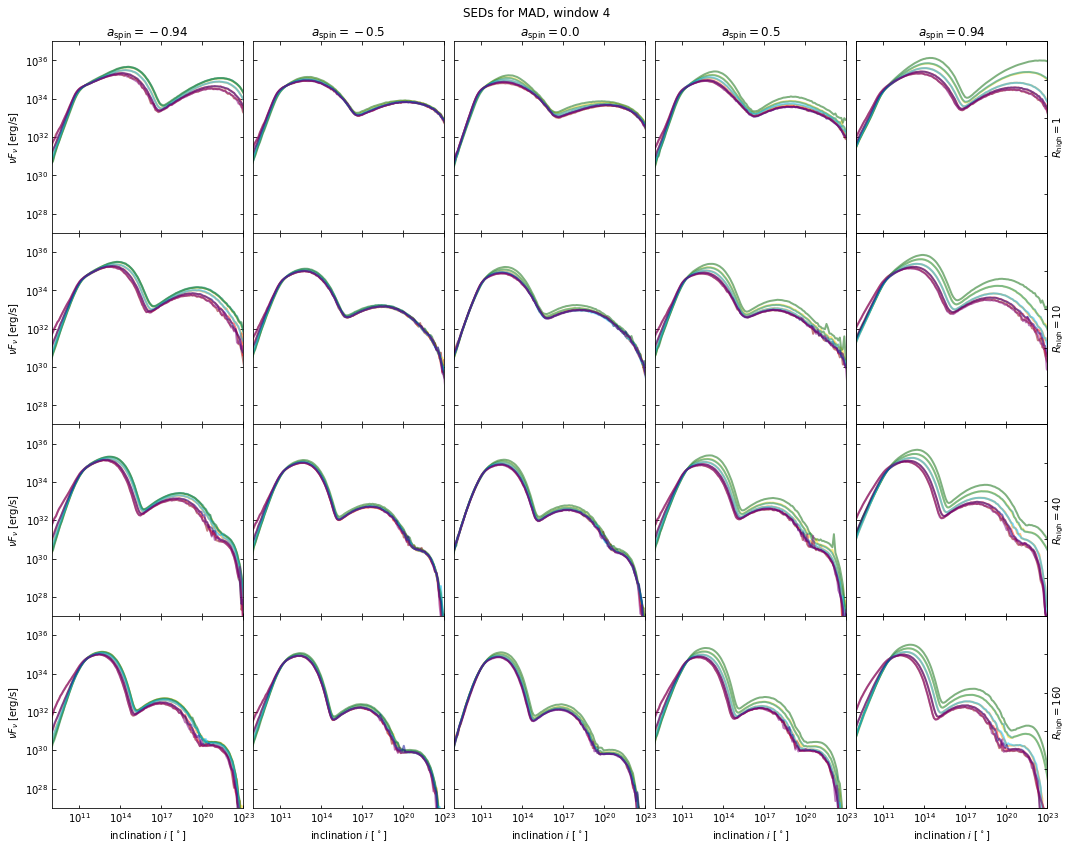

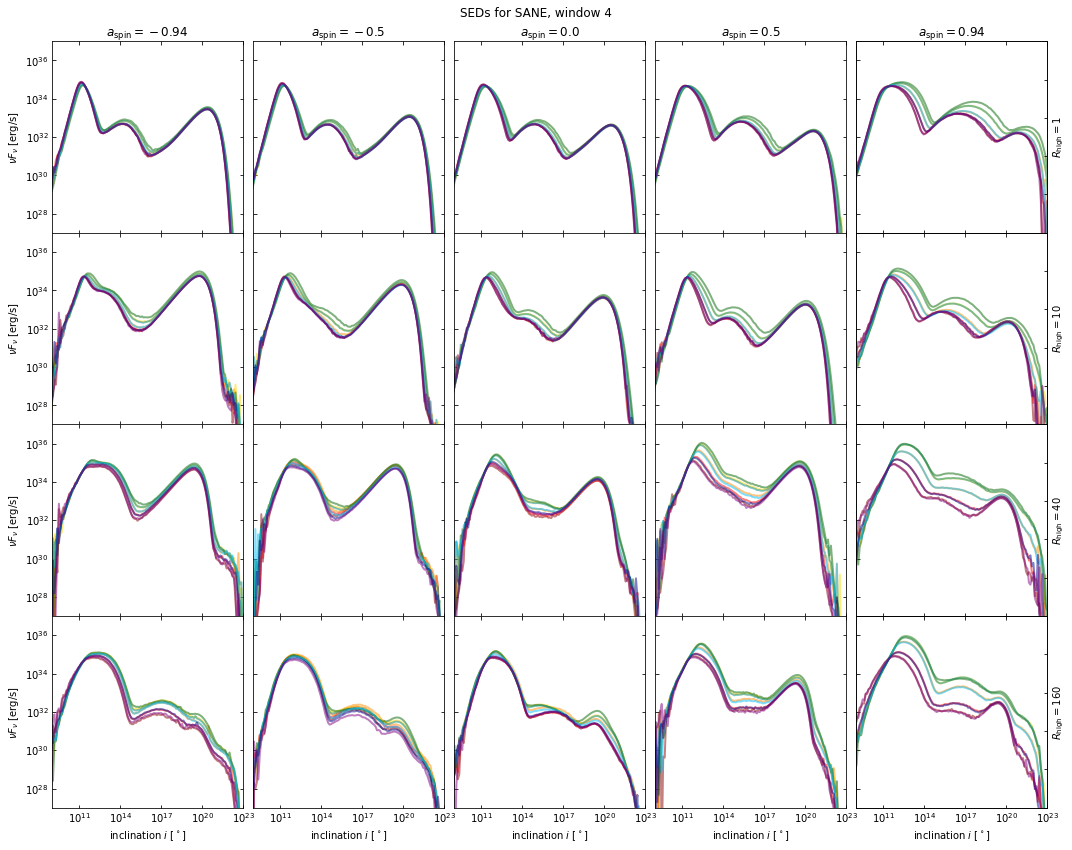

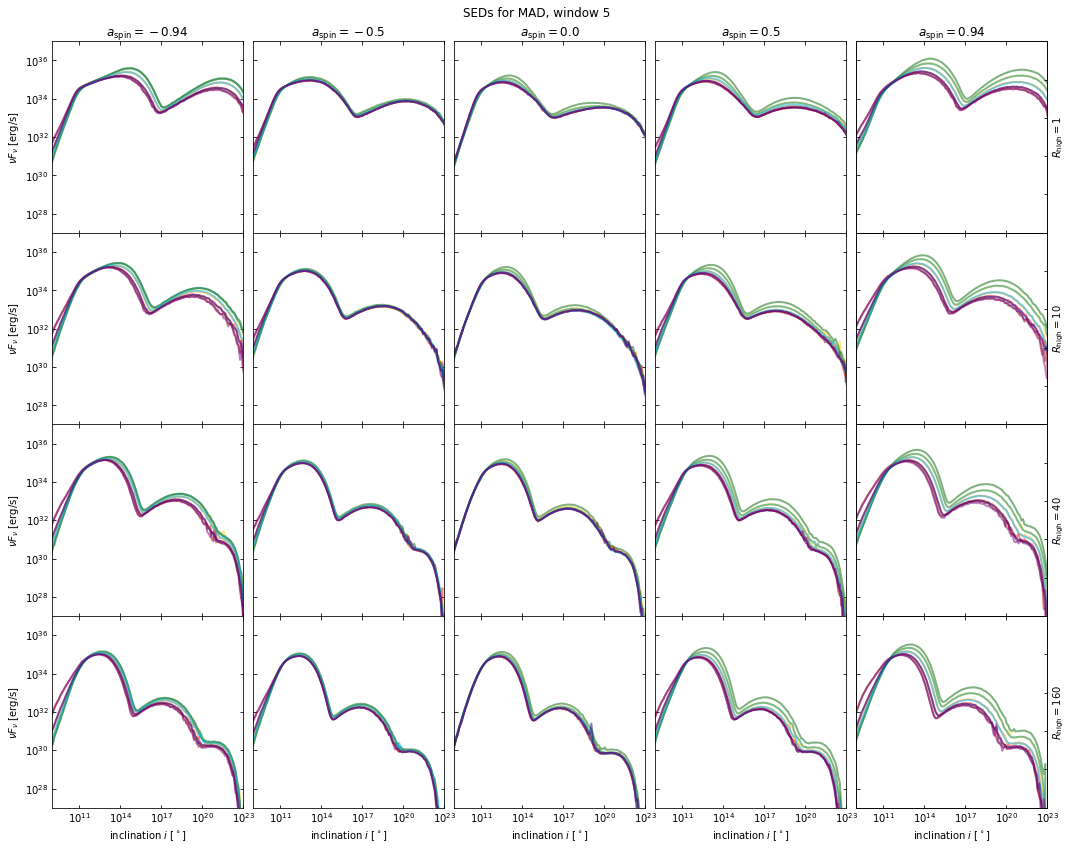

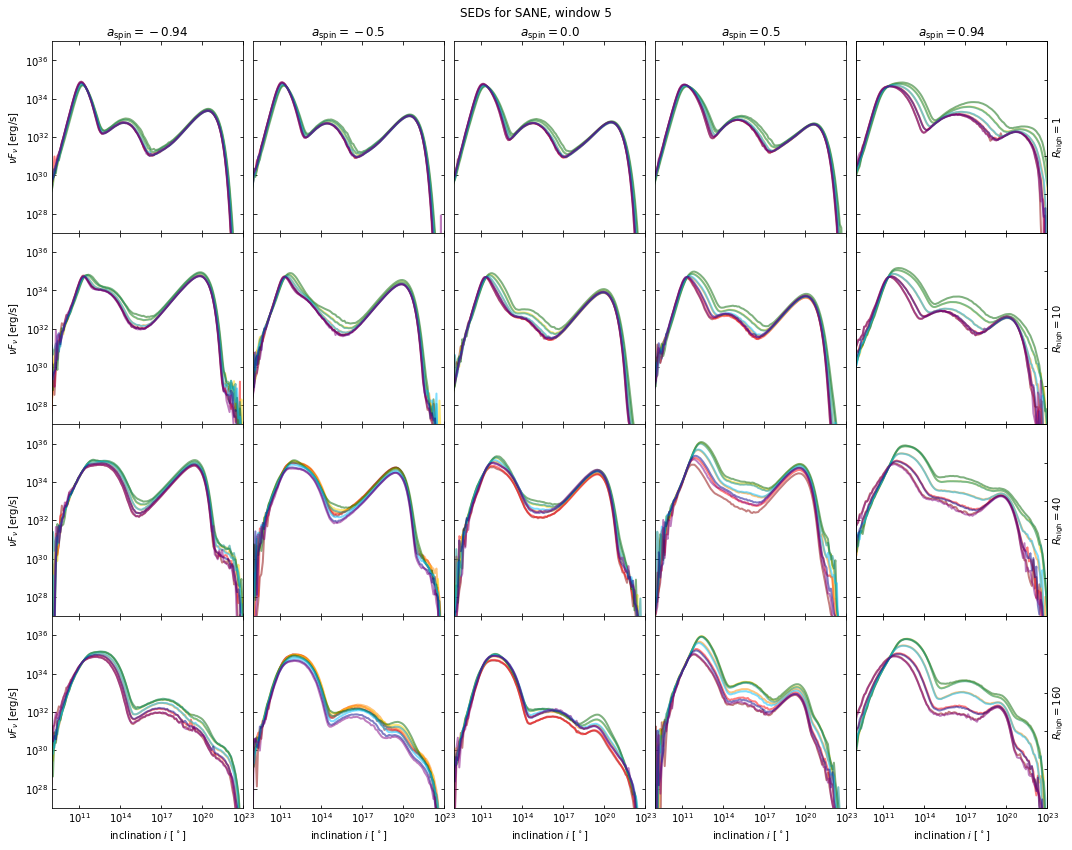

In [5]:
magmap = {'M':'MAD', 'S':'SANE'}

for w in win:
    for m in mag:
        viz.grid(pf(win=w)(mag=m).sort_values('inc'), plot, aspin=aspin, Rhigh=Rhigh,
                 figsize=(15,12), title=f'SEDs for {magmap[m]}, window {w}',
                 xtitle=r'$a_\mathrm{{spin}}={}$',     ytitle=r'$R_\mathrm{{high}}={}$',
                 xlabel=r'inclination $i$ [$^\circ$]', ylabel=r'$\nu F_\nu$ [erg/s]',
                 fout=f'output/plot/sedgrid_{magmap[m]}_w{w}')